# Accessible Features Usage Analysis

This notebook performs a step-by-step data analysis of user engagement with inclusive accessible features. The analysis follows five key steps:

1. **Data Cleaning**: Addressing missing values and handling outliers in key columns.
2. **Exploratory Data Analysis (EDA)**: Analyzing user engagement and feature adoption.
3. **Feature Engineering**: Developing new features to enhance analysis.
4. **Predictive Modeling**: Building a model to understand user behavior.
5. **Visualization**: Utilizing tools such as Tableau Public for advanced visualizations, where appropriate.

The objective is to deliver key summary findings at each step of the analysis and extract actionable recommendations to enhance feature adoption and user engagement.

# Data Cleaning

## 1.0 Overview and Inspecting of the Dataset
The purpose of this step is to understand and examine the structure of the dataset by reviewing the number of rows and columns, inspecting the data types, and generating summary statistics for numerical columns.

In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Load the Excel file into a dataframe
excel_file = './original_data/inclusive_features_usage.xlsx'
df = pd.read_excel(excel_file, engine='openpyxl')

# Display the shape of the dataset
print(f"Dataset shape (rows, columns): {df.shape}")

# Display the first few rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display data types of each column
print("\nData types for each column:")
print(df.dtypes)

# Display summary statistics for numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())


Dataset shape (rows, columns): (10000, 8)

First 5 rows of the dataset:
     user_id        feature_used  session_duration  engagement_score  \
0  user_4737        Multilingual             60.77                 4   
1  user_1492      Text-to-Speech             20.20                 5   
2  user_5936     Colorblind Mode             93.78                 2   
3  user_5519     Colorblind Mode             26.36                 3   
4  user_1853  High Contrast Mode             91.67                 5   

   accessibility_settings     age_group      gender additional_attributes  
0                       4      Teenager         NaN                LGBTQ+  
1                       4  Professional  Non-Binary                   NaN  
2                       2         Adult      Female                   NaN  
3                       1         Adult         NaN                LGBTQ+  
4                       1   Young Adult        Male                   NaN  

Data types for each column:
user_id   

## 1.1 Additional Quality Checks for Data Integrity
Below are additional checks to ensure that the dataset has no errors or inconsistencies.

### Unique Identifiers
It is important to ensure that each `user_id` is unique. This confirms whether each user is represented only once in the dataset or if users have multiple interactions recorded.

In [3]:
total_rows = len(df)
unique_users = df['user_id'].nunique()
print(f"Total rows: {total_rows}")
print(f"Unique users: {unique_users}")

Total rows: 10000
Unique users: 6358


### Duplicate Rows 
We check for duplicate rows to avoid data redundancy.

In [4]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


### Categorical Variable Distribution
It is helpful to understand the distribution of categorical columns such as feature_used, age_group, and gender.

In [5]:
# Display the distribution of feature usage
print("\nFeature usage distribution:")
print(df['feature_used'].value_counts())

# Display the distribution of age group
print("\nAge group distribution:")
print(df['age_group'].value_counts())

# Display the distribution of gender
print("\nGender distribution:")
print(df['gender'].value_counts())

# Display the distribution of gender
print("\nAdditional attributes distribution:")
print(df['additional_attributes'].value_counts())


Feature usage distribution:
feature_used
Colorblind Mode       2060
High Contrast Mode    2007
Text-to-Speech        1998
Multilingual          1978
Visual Aid            1957
Name: count, dtype: int64

Age group distribution:
age_group
Adult           2035
Senior          2026
Young Adult     1993
Professional    1990
Teenager        1956
Name: count, dtype: int64

Gender distribution:
gender
Male          2029
Female        1990
Non-Binary    1984
Name: count, dtype: int64

Additional attributes distribution:
additional_attributes
Person of Color    2018
LGBTQ+             1979
Name: count, dtype: int64


## 1.2 Data Cleaning and Preparation
"Missing Values" and "Outliers" handling.

### Handling Missing Values
This section identifies and handles columns with missing values. 

- The process includes:
    - Detecting explicit `NaN` values in each column.
    - Identifying and counting placeholder values commonly used to represent missing or unknown data, such as `"NA"`, `"N/A"`, `"Unknown"`, `"None"`, etc.
 
- The approach considers:
    - The significance of missing values in key columns and their potential impact on interpretability and downstream modeling.
    - The proportion of missing values relative to the dataset size.

#### Values Check and To Understand the Proportion of Missing Data

In [6]:
# Function to detect missing values and placeholders
def check_missing_and_placeholders(df):

    # Placeholder lists for common string and numerical values
    string_placeholders = ["", "NA", "N/A", "Unknown", "Other", "Not Specified", "None", "Missing"]
    numeric_placeholders = [-1, 999, 9999]

    # Summary of missing data
    placeholder_summary = []

    for col in df.columns:
        # Get unique non-null values to avoid duplicates
        unique_values = df[col].dropna().unique()

        # Handle string placeholders for object-type columns
        if df[col].dtype == "object":
            # Convert empty strings to NaN for standardization
            df[col] = df[col].str.strip().replace("", np.nan)
            for placeholder in string_placeholders:
                count = (df[col] == placeholder).sum()
                placeholder_summary.append({"Column": col, "Placeholder": placeholder, "Count": count})

        # Handle numeric placeholders for numerical-type columns
        if np.issubdtype(df[col].dtype, np.number):
            for placeholder in numeric_placeholders:
                count = (df[col] == placeholder).sum()
                placeholder_summary.append({"Column": col, "Placeholder": placeholder, "Count": count})

        # NaN Count
        nan_count = df[col].isnull().sum()
        placeholder_summary.append({"Column": col, "Placeholder": "NaN", "Count": nan_count})

    # Create a DataFrame from the summary
    placeholder_df = pd.DataFrame(placeholder_summary)
    placeholder_df = placeholder_df.pivot_table(index="Column", columns="Placeholder", values="Count", fill_value=0).reset_index()

    return placeholder_df

# Run the function and display results
placeholder_summary_df = check_missing_and_placeholders(df)
print("Detailed Placeholder and Missing Values Summary:")
display(placeholder_summary_df)

# Combined summary of missing percentages and placeholders
combined_summary = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values Per Column:")
print(combined_summary)

Detailed Placeholder and Missing Values Summary:


Placeholder,Column,-1,999,9999,,Missing,N/A,NA,NaN,None,Not Specified,Other,Unknown
0,accessibility_settings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,additional_attributes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6003.0,0.0,0.0,0.0,0.0
2,age_group,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,engagement_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,feature_used,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,gender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3997.0,0.0,0.0,0.0,0.0
6,session_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,user_id,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Percentage of Missing Values Per Column:
user_id                    0.00
feature_used               0.00
session_duration           0.00
engagement_score           0.00
accessibility_settings     0.00
age_group                  0.00
gender                    39.97
additional_attributes     60.03
dtype: float64


#### Key Observations:
- The `gender` column contains approximately **40% missing values**.
- The `additional_attributes` column contains **60% missing values**.
- Numerical columns, including `session_duration` and `engagement_score`, do not contain `NaN` or placeholder values.

#### Handling Missing Values (Imputation Choices)
- **`gender` column (~40% missing values)**: Imputed with `"Not Disclosed"` to retain records and avoid assumptions about missing data.
- **`additional_attributes` column (~60% missing values)**: Imputed with `"No Additional Attributes"` to provide a neutral label for missing demographic data.
- **Numerical columns (`session_duration`, `engagement_score`)**: No missing values or placeholders detected; no imputation needed.

In [7]:
import os

# Handle missing values in all columns by replacing NaN with "Not Disclosed"
df = df.fillna("Not Disclosed")

# Save the updated DataFrame to a new Excel file
save_dir = "output_data"
os.makedirs(save_dir, exist_ok=True)

imputed_file_path = os.path.join(save_dir, "imputed_data.xlsx")
df.to_excel(imputed_file_path, index=False)
print(f"Missing values handled and saved to '{imputed_file_path}' successfully.")


Missing values handled and saved to 'output_data/imputed_data.xlsx' successfully.


### Outlier Detection

This section focuses on detecting and handling outliers for the `session_duration` and `engagement_score` columns.

**Objective:**  
Outliers can distort data analysis and affect model performance. The distribution of the variables will be assessed, and appropriate methods will be used to detect potential outliers. Since `engagement_score` is categorical, typical numerical outlier detection methods may not apply directly.

**Methods:**
1. **Skewness and Kurtosis Check:** Assesses data distribution symmetry and peakness.
2. **Q-Q Plot Visualization:** Provides a visual check for normality.
3. **Statistical Normality Test (D'Agostino's Test):** Confirms if the data follows a normal distribution.
4. **IQR (Interquartile Range) Method:** A baseline method for detecting outliers based on spread.
5. **Isolation Forest:** A method for detecting outliers in non-normal distributions.

In [8]:
# Load the imputed data
imputed_file_path = "output_data/imputed_data.xlsx"
df = pd.read_excel(imputed_file_path, engine='openpyxl')
print("Imputed dataset loaded successfully.")

Imputed dataset loaded successfully.


#### Skewness and Kurtosis Check
Numerically assessing the distribution of the variables. The results give insights before running normality and outlier detection tests.

In [9]:
# Define numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numerical_columns:
    print(f"{col} - Skewness: {df[col].skew():.3f}, Kurtosis: {df[col].kurtosis():.3f}")

session_duration - Skewness: -0.008, Kurtosis: -1.220
engagement_score - Skewness: -0.037, Kurtosis: -1.307
accessibility_settings - Skewness: 0.008, Kurtosis: -1.265


- For engagement score: skewness close to 0, so the data is nearly symmetrical (not heavily left or right-skewed). Skewness and kurtosis indicate engagement_score is fairly symmetrical and doesn’t have extreme values. However, this is a categorical-like variable (discrete values: 1 to 5), so normality assumptions don’t apply directly.

- For session duration: skewness indicates the data is almost perfectly symmetrical (very close to 0). Kurtosis suggests a flatter (platykurtic) distribution, meaning it has fewer extreme outliers in the tails. Since it’s uniform-like, typical outlier detection methods like IQR and Z-score often won't detect meaningful outliers.

#### QQ Plot Visualization Outlier Check 
The Q-Q plots show how well the data aligns with a normal distribution. It visually confirms deviations from normality. 

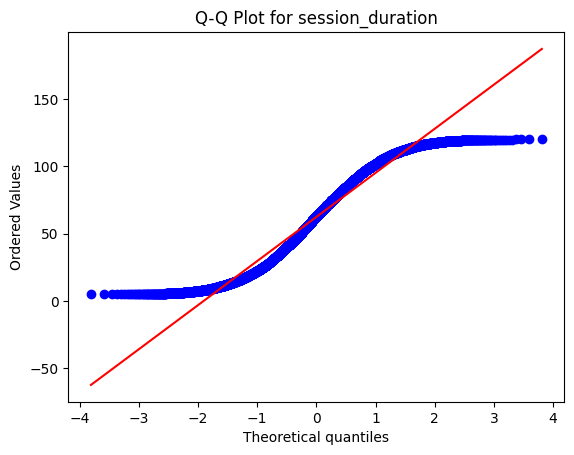

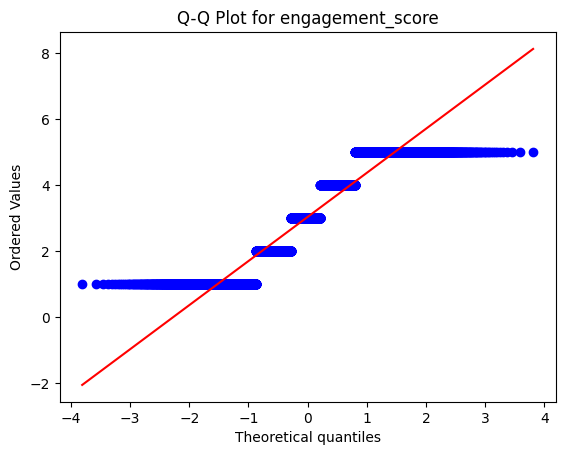

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def qq_plot(data, column):
    stats.probplot(data[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

# Q-Q Plots for the columns
qq_plot(df, 'session_duration')
qq_plot(df, 'engagement_score')

- The Q-Q plot for `session_duration` shows some deviations from the normality line at the upper end, indicating potential outliers even though the skewness doesn’t indicate it strongly.
- The Q-Q plot for `engagement_score` shows a stepwise pattern, reflecting its categorical nature.
- Note these plots help visualize normality but can't directly detect outliers.

#### Normality Test for session_duration

In [11]:
from scipy.stats import normaltest

# D'Agostino and Pearson Test for session_duration
stat, p_value = normaltest(df['session_duration'])
print(f"D'Agostino and Pearson Test for session_duration p-value: {p_value:.3f}")

D'Agostino and Pearson Test for session_duration p-value: 0.000


- **P-value Interpretation:**  
  A p-value close to 0 indicates that `session_duration` does not strictly follow a normal distribution. Therefore, outlier detection methods that handle non-normal data are appropriate. 

#### IQR Method (Baseline Outlier Detection)

In [12]:
# IQR-based Outlier Detection
def detect_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        print(f"{col}: {outliers.shape[0]} outliers detected (IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}])")
    return outlier_counts

# Detect outliers using IQR
iqr_outliers = detect_outliers_iqr(df, numerical_columns)


session_duration: 0 outliers detected (IQR bounds: [-54.72, 179.39])
engagement_score: 0 outliers detected (IQR bounds: [-1.00, 7.00])
accessibility_settings: 0 outliers detected (IQR bounds: [-3.50, 8.50])


- **Results:**  
  No outliers were detected for `session_duration` or `engagement_score` using the IQR method. This result aligns with the distribution of `session_duration`, where traditional IQR bounds may not capture extreme values.

#### Isolation Forest for session_duration

session_duration: 100 outliers detected using Isolation Forest (contamination=0.01).


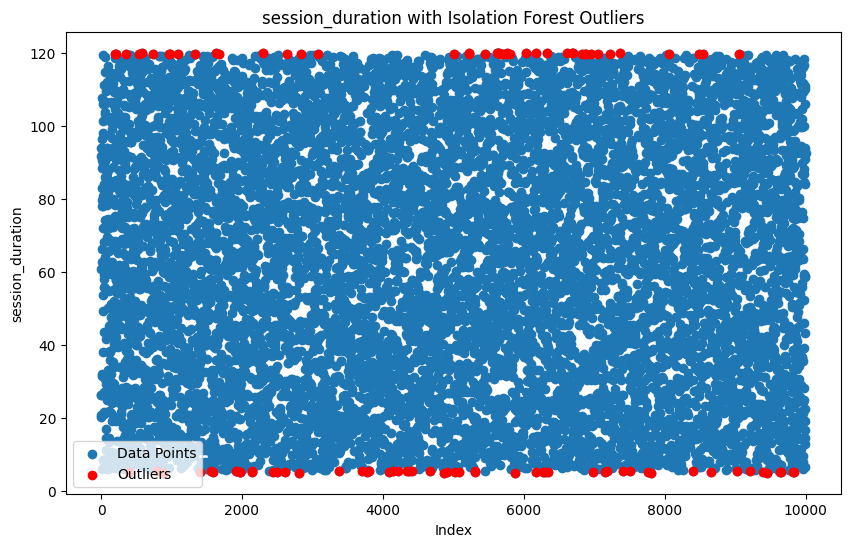

In [13]:
from sklearn.ensemble import IsolationForest

# Isolation Forest with visualization
def isolation_forest_outlier_detection(df, column, contamination=0.01):
    model = IsolationForest(contamination=contamination, random_state=42)
    values = df[column].values.reshape(-1, 1)
    labels = model.fit_predict(values)
    outlier_df = df[labels == -1]  # Get outlier rows
    print(f"{column}: {outlier_df.shape[0]} outliers detected using Isolation Forest (contamination={contamination}).")
    
    # Plot outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column], label='Data Points')
    plt.scatter(outlier_df.index, outlier_df[column], color='red', label='Outliers')
    plt.title(f"{column} with Isolation Forest Outliers")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()
    plt.show()
    
    return outlier_df

# Apply Isolation Forest for session_duration
session_duration_outliers = isolation_forest_outlier_detection(df, 'session_duration', contamination=0.01)


- **Isolation Forest Results:**  
  Isolation Forest detected 100 outliers in `session_duration` using `contamination=0.01`. This method is suitable for datasets
that do not follow a normal distribution.

#### Outlier Detection Summary

- `engagement_score` does not contain meaningful outliers due to its categorical nature.
- `session_duration` shows outliers detected by Isolation Forest. The IQR method did not detect any significant outliers, likely due to the uniform-like distribution.
- Isolation Forest was chosen for `session_duration` due to its effectiveness with non-normal distributions.

#### Outlier Treatment Decision:
After assessing the distribution of the data, the following decision was made regarding outlier handling:
- **Session Duration (`session_duration`)**: No modifications were applied to the outliers. The values likely reflect valid user behaviors (e.g., users accessing assistive features may have longer session times).
- **Engagement Score (`engagement_score`)**: No outlier handling was necessary, as the values range from 1 to 5 and represent valid engagement levels rather than statistical anomalies.

#### **Justification**:
1. The dataset contains inclusive accessible product usage data where extreme values may indicate meaningful user interactions rather than data errors.
2. Modifying or removing potential outliers may inadvertently exclude significant user behaviors.
3. The analysis will account for the potential influence of extreme values by using visualizations and robust statistical models where applicable.
4. By retaining all data, the analysis remains more inclusive and representative of real user interactions.

## 1.3 High Accessibility User Classification

This step creates a new binary column `high_accessibility_user`, where:
- `1` (True) indicates users who enabled three or more accessibility settings.
- `0` (False) indicates users who enabled fewer than three settings.

High Accessibility User Classification Distribution:
high_accessibility_user
0    5035
1    4965
Name: count, dtype: int64


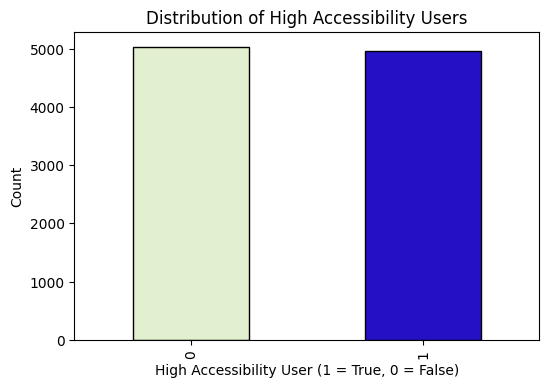

Updated data saved with 'high_accessibility_user' column to 'output_data/updated_data_with_accessibility_user.xlsx' successfully.


In [14]:
# Create the high_accessibility_user column
df['high_accessibility_user'] = (df['accessibility_settings'] >= 3).astype(int)

# Display distribution of the new column
print("High Accessibility User Classification Distribution:")
print(df['high_accessibility_user'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
df['high_accessibility_user'].value_counts().plot(kind='bar', color=['#e3f0cf', '#2510c5'], edgecolor='black')

plt.title("Distribution of High Accessibility Users")
plt.xlabel("High Accessibility User (1 = True, 0 = False)")
plt.ylabel("Count")
plt.show()

# Save the updated DataFrame to a new Excel file
updated_file_path = os.path.join(save_dir, "updated_data_with_accessibility_user.xlsx")
df.to_excel(updated_file_path, index=False)
print(f"Updated data saved with 'high_accessibility_user' column to '{updated_file_path}' successfully.")

**Explanation:**  
This threshold distinguishes users with higher customization, improving analysis.

**Implications:**  
- Simplifies comparisons between user groups.  
- Supports clearer interpretability and trend identification.

## 1.4 Intersectionality Analysis

This step adds a new column, `intersectional_group`, combining `age_group`, `gender`, and `additional_attributes` to facilitate intersectional analysis. This allows for more nuanced insights into how different demographic attributes intersect to influence feature adoption and engagement.

In [15]:
# Create the intersectional_group column by combining demographic attributes
df['intersectional_group'] = df['age_group'] + " - " + df['gender'] + " - " + df['additional_attributes']

# Save the updated DataFrame to a new Excel file
updated_file_path = os.path.join(save_dir, "updated_data_with_intersectional_group.xlsx")
df.to_excel(updated_file_path, index=False)
print(f"Updated data saved with 'intersectional_group' column to '{updated_file_path}' successfully.")

Updated data saved with 'intersectional_group' column to 'output_data/updated_data_with_intersectional_group.xlsx' successfully.


# Feature Engineering & Predictive Modeling

## 4.0 Feature Engineering: Creating New Features

This section involves engineering additional features to enhance the analysis. The following features were created:

1. **Average session duration per feature used**: This provides insights into how long users engage with different features on average.
2. **Average engagement score grouped by accessibility settings and demographics**: This highlights the engagement levels for various user groups based on accessibility customizations and demographics.

### 4.1 Average Session Duration per Feature Used
The average session duration was calculated for each feature to understand which features have longer user interactions.

In [16]:
# Calculate average session duration per feature used
avg_session_duration_per_feature = df.groupby('feature_used')['session_duration'].mean().reset_index()
avg_session_duration_per_feature.rename(columns={'session_duration': 'avg_session_duration'}, inplace=True)

# Display the results
print(avg_session_duration_per_feature)

# Save the results to a new Excel file
output_path = './output_data/avg_session_duration_per_feature.xlsx'
avg_session_duration_per_feature.to_excel(output_path, index=False)
print(f"Average session duration per feature saved to {output_path}")

         feature_used  avg_session_duration
0     Colorblind Mode             62.819015
1  High Contrast Mode             62.150608
2        Multilingual             62.902599
3      Text-to-Speech             62.377668
4          Visual Aid             61.953311
Average session duration per feature saved to ./output_data/avg_session_duration_per_feature.xlsx


### 4.2 Average Engagement Score by Accessibility Settings and Demographics
This feature calculates the average engagement score grouped by accessibility_settings, age_group, and gender. The results provide a breakdown of engagement trends based on key demographic and accessibility factors.

In [26]:
# Calculate average engagement score by accessibility settings and demographics
avg_engagement_by_group = (
    df.groupby(['accessibility_settings', 'age_group', 'gender'])['engagement_score']
    .mean()
    .reset_index()
)

# Display the results
print(avg_engagement_by_group)

# Formatting for better readability
avg_engagement_by_group['avg_engagement_score'] = avg_engagement_by_group['engagement_score'].round(3)
avg_engagement_by_group.drop(columns=['engagement_score'], inplace=True)  # Remove redundant column

# Save the results to a new Excel file
output_path = './output_data/avg_engagement_score_by_group.xlsx'
avg_engagement_by_group.to_excel(output_path, index=False)
print(f"Average engagement score by group saved to {output_path}")

     accessibility_settings     age_group         gender  engagement_score
0                         0         Adult         Female          3.151515
1                         0         Adult           Male          2.746032
2                         0         Adult     Non-Binary          3.036145
3                         0         Adult  Not Disclosed          2.859155
4                         0  Professional         Female          2.805556
..                      ...           ...            ...               ...
115                       5      Teenager  Not Disclosed          2.968254
116                       5   Young Adult         Female          2.860759
117                       5   Young Adult           Male          3.032258
118                       5   Young Adult     Non-Binary          3.303030
119                       5   Young Adult  Not Disclosed          3.022901

[120 rows x 4 columns]
Average engagement score by group saved to ./output_data/avg_engagement_scor

### 4.3 Predictive Modeling: Logistic Regression to Classify High Accessibility Users

This section builds a logistic regression model to predict whether a user is classified as a `high_accessibility_user` based on key demographic and engagement features. The model utilizes the following features:
- `age_group`
- `gender`
- `additional_attributes`
- `engagement_score`
- `feature_used`

#### Steps:
1. Preprocess categorical variables using one-hot encoding.
2. Split the data into training and testing sets.
3. Train a logistic regression model.
4. Evaluate model performance using accuracy, precision, recall, and F1-score.

In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Prepare the features and target
X = df[['age_group', 'gender', 'additional_attributes', 'engagement_score', 'feature_used']]
y = df['high_accessibility_user']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  
X_encoded = encoder.fit_transform(X[['age_group', 'gender', 'additional_attributes', 'feature_used']])
encoded_feature_names = encoder.get_feature_names_out(['age_group', 'gender', 'additional_attributes', 'feature_used'])

# Combine encoded features with numeric columns
X_processed = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_processed['engagement_score'] = X['engagement_score'].reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Explanation of Confusion Matrix
print("\nExplanation:")
print("The confusion matrix shows the following:")
print(f" - True Negatives (Top-left): {conf_matrix[0, 0]} users correctly classified as not high accessibility users.")
print(f" - False Positives (Top-right): {conf_matrix[0, 1]} users incorrectly classified as high accessibility users.")
print(f" - False Negatives (Bottom-left): {conf_matrix[1, 0]} users incorrectly classified as not high accessibility users.")
print(f" - True Positives (Bottom-right): {conf_matrix[1, 1]} users correctly classified as high accessibility users.")

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred)
print(class_report)

# Feature importance for logistic regression
feature_importance = pd.DataFrame({'Feature': X_processed.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Save results to a file
output_path = './output_data/logistic_regression_results.xlsx'
feature_importance.to_excel(output_path, index=False)
print(f"Logistic regression results saved to {output_path}")

Confusion Matrix:
[[563 449]
 [538 450]]

Explanation:
The confusion matrix shows the following:
 - True Negatives (Top-left): 563 users correctly classified as not high accessibility users.
 - False Positives (Top-right): 449 users incorrectly classified as high accessibility users.
 - False Negatives (Bottom-left): 538 users incorrectly classified as not high accessibility users.
 - True Positives (Bottom-right): 450 users correctly classified as high accessibility users.

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1012
           1       0.50      0.46      0.48       988

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.51      2000

Logistic regression results saved to ./output_data/logistic_regression_results.xlsx


# 5. Insights & Recommendations

## Key Findings Summary Sections
- Data Cleaning & Preparation
- Exploratory Data Analysis (EDA)
- Feature Engineering & Predictive Modeling

### Key Findings Summary - Data Cleaning & Preparation
- The dataset contains 10,000 rows and 8 columns, with no duplicate rows identified. Unique identifiers ensure there is no redundancy in user entries.
- Missing values were predominantly observed in the gender (40%) and additional_attributes (60%) columns, which were imputed with "Not Disclosed" respectively to retain records and avoid bias.
- Outliers in session_duration were identified using Isolation Forest (100 detected) but were retained to preserve valid user behavior, as session times likely reflect real usage patterns.
- Data cleaning ensured integrity and consistency, facilitating analysis without significant loss of information.

### Key Findings Summary - Exploratory Data Analysis (EDA)

#### Engagement Score Analysis (part 1)
** Note: Please reference Tableau .twbx workbook and pdfs (two dashboards pdfs and worksheet visual pdfs) that support this section of the analysis.**
- Text-to-Speech: Female Teenagers have the highest engagement, with an average score of 3.29.
- Visual Aid: Female Teenagers lead with the highest average engagement score of 3.38 (Female Young Adults also have 3.38).
- Colorblind Mode: Female Professionals show the highest engagement, with an average score of 3.28 (Non-Binary Professionals also have 3.28 ; as well as Seniors (gender not disclosed) at 3.28).
- High Contrast Mode: Female Young Adults have the highest engagement, with an average score of 3.25 
- Multilingual Feature: Female Adults lead with an engagement score of 3.37

#### Feature Usage by Intersectional Demographic (part 2)
- Colorblind Mode: Highest engagement is among Professionals (Gender Not Disclosed - Person of Color), with an average score of 3.31.
- High Contrast Mode: Seniors (LGBTQ+) have the highest engagement, scoring 3.41.
- Multilingual Feature: Female Adults lead with the highest engagement at 3.37.
- Text-to-Speech: Female Teenagers score the highest, with an average of 3.29.
- Visual Aid: Female Seniors and Female Teenagers show the highest engagement at 3.38.

#### Key Findings Across Both Analysis (parts 1 & 2)

1. Consistency Across Features:
- Text-to-Speech and Visual Aid engagement consistently highlight Female Teenagers as a key demographic group with the highest engagement scores (3.29 and 3.38, respectively). This indicates a strong affinity for these features among this subgroup across both analyses.

2. Differences in Top-Engaged Groups:
- Colorblind Mode shows a slight divergence:
    - General engagement analysis highlights multiple groups (e.g., Female Professionals, Non-Binary Professionals, Seniors) all scoring equally at 3.28.
    - Intersectional analysis reveals Professionals (Gender Not Disclosed - Person of Color) as the top group with a score of 3.31. This suggests that intersectionality uncovers more nuanced insights.
- Similarly, High Contrast Mode identifies Female Young Adults (3.25) in the general analysis but highlights Seniors (LGBTQ+) (3.41) when intersectionality is considered, showing the added value of exploring intersectional attributes.

3. Consistent Leadership by Female Adults:
- Across Multilingual Feature, Female Adults consistently lead the engagement scores in both analyses, showing their high usage and strong interaction with this feature.

4. Value of Intersectional Analysis:
- The intersectional demographic analysis unveils unique groups (e.g., Seniors - LGBTQ+ for High Contrast Mode, Professionals - Gender Not Disclosed - Person of Color for Colorblind Mode) that the general analysis does not isolate. This emphasizes the importance of considering layered demographic attributes to capture deeper insights.

5. Shared Top Scores for Visual Aid:
- Both analyses highlight Female Teenagers and Female Seniors as equally leading in Visual Aid engagement at 3.38, reinforcing their shared affinity for this feature.

### Key Findings Summary - Feature Engineering & Predictive Modeling

#### Average Session Duration per Feature: 
- Calculated average session durations for accessibility features to identify engagement trends. Multilingual showed the longest average duration (62.90 seconds), closely followed by Colorblind Mode and Text-To-Speech.
  
#### Average Engagement Score by Accessibility Settings and Demographics: 
- Analyzed engagement scores grouped by accessibility settings (0-5), age group, and gender. At the highest accessibility setting (5), Senior Non-Binary users showed the highest engagement (3.328), followed by Female Teenagers (3.305) highlighting specific demographic responsiveness to accessibility enhancements.
  
#### Predictive Model: 
- A logistic regression model predicted high accessibility users with 51% accuracy, identifying "Additional Attributes - Person of Color" (.10) and “Age Group - Young Adult" (.07)  as the most influential features.

## Actionable Recommendations:
- Enhance Multilingual Feature Engagement for Non-Binary and Male Users: While Adult Females lead with a high engagement score of 3.37, Non-Binary users (Teenagers: 2.91) and Male users (Senior: 2.81, Adult: 2.83) have room for improvement. Provide tailored multilingual use cases, such as workplace or educational applications, to increase adoption.

- Increase Engagement Among Adult Males: Target Adult Males, who have the lowest engagement scores across several features, such as High-Contrast Mode (2.55) and Color-Blind Mode (2.73). Implement tailored campaigns, such as showcasing real-world applications of these features for professional and personal use, to make these tools more relatable.

- Use Intersectional Data to Improve Accessibility Features: Groups like "Professionals – Gender Not Disclosed – Person of Color" show high engagement with Colorblind Mode (3.31), emphasizing the value of inclusive accessible design. Build on this success by tailoring other features to meet the specific needs of diverse user groups, using their feedback to make accessibility tools more relevant and widely adopted.